# 4. Evaluation

## 4.1 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

from Classification import Classification
from Ensemble import Ensemble

C:\Users\candy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
sns.set_context('poster')

In [3]:
x_train = pd.read_csv('Data/3.x_train_data.csv')
y_train = pd.read_csv('Data/3.y_train_data.csv')

In [4]:
x_test = pd.read_csv('Data/4.x_test_data.csv')
y_test = pd.read_csv('Data/4.y_test_data.csv')

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7524, 138)
(7524, 1)
(1881, 138)
(1881, 1)


In [6]:
df = pd.read_csv('Data/4.all_models.csv')

## 4.2 Best Model Selection

I focused on 3 factors of defining a good model:

1. Good Validation Accuracy
2. Good Training Accuracy
3. Small Difference between Training and Validation Accuracy

In [7]:
df

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Decision Tree,0.432926,0.353535,0.079390
1,Random Forest,0.647351,0.457735,0.189615
2,Logistic Regression,0.562112,0.509304,0.052809
3,SVM,0.559986,0.511430,0.048556
4,Naive Bayes,0.372142,0.387028,-0.014886
5,KNN,0.507000,0.501329,0.005671
6,AdaBoost,0.513734,0.503987,0.009747
7,XGBoost,0.853624,0.484848,0.368775
8,Voting,0.557859,0.515683,0.042176
9,Stacking,0.554670,0.519405,0.035265


I chose the Stacking ensemble model ( (Adaboost with log_reg_2) stacked with log_reg_2 ) as my best model, because it has the highest validation accuracy with only around 3.5% drop from train to validation in accuracy. I wanted to minimise overfitting and make the model as reusable as possible. Stacking achieved a reasonable training accuracy as well, although it did not reach the level of some of the other ensemble techniques.

In [8]:
best_model = pickle.load(open('Models/Stacking.pkl','rb'))

## 4.3 Best Model Tested

I next tested the best model with the earlier saved test data. The model managed to get a high test accuracy, similar to the validation data from the model training stage. This is very good, proving that prioritising a high validation score, and minimising the difference between train and validation accuracy, has helped it classify new review texts very well.

In [9]:
best_model.get_test_scores(x_test,y_test)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Stacking,0.55467,0.507709,0.046961


,1,2,3,4,5
precision,0.626344,0.441667,0.417098,0.460000,0.600551
recall,0.619681,0.447887,0.428191,0.473008,0.566234
f1-score,0.622995,0.444755,0.422572,0.466413,0.582888


## 4.4 Deeper Dive Into Best Model

Looking at the precision, recall, and f1 score, I also noticed the scores were higher around scores of 1 and 5, less for 2 and 4, and the least for 3. This shows that the models performs well on more extreme opinions on reviews than mixed opinions.

In [10]:
best_model.classification_report

,1,2,3,4,5
precision,0.594937,0.422652,0.481771,0.452830,0.639566
recall,0.616798,0.396373,0.492021,0.469274,0.621053
f1-score,0.605670,0.409091,0.486842,0.460905,0.630174


Looking into different metrics and deeper into my best model; Stacking, I learnt that most the False Postives came from close misses (e.g. predicting a score of 4 for a true score of 5). This is best shown by these two confusion matrixes (validation and test). 

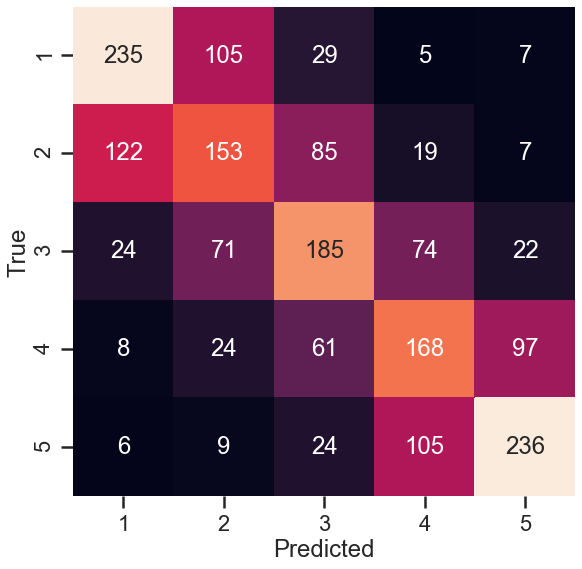

In [11]:
best_model.conf_matrix()

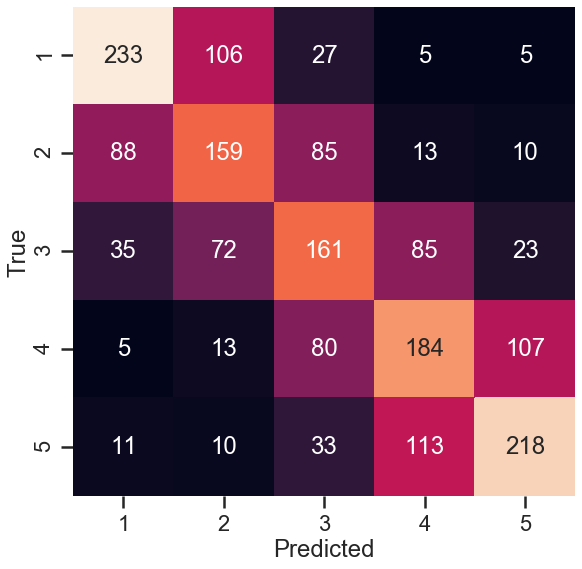

In [12]:
best_model.test_conf_matrix()

The adjacent squares of the diagonal going across the confusion matrix, shows that the model's second highest prediction, for a given class (review score) is always a review score that is +- the true score.
Very few reviews that have a score of 5, have been predicted to have a score of 1 or 2. This is very relieving to know, the majority of the error for the model, is no different to the error a human may make classifying a review to a score with a scale of 1-5.

## 4.5 Application Deployability

### 4.5.1 Deployability?

- most errors were near misses (e.g. 5 predicted as 4)
- extreme scores (1 and 5) were relatively accurate
- comparable to human prediction
- reusable and consistent

Given the classifcation problem is 5 way multi-class one and the adjacent classes can have overlap in the english language even to humans, this model I have created can be deployed.

Applying this model will address the problem of not having a full understanding of public opinion of our hotel. We can apply this to new sources for opinions on our hotel and yield more feedback then we did had before.

### 4.5.2 Future Improvements

- Model using RNN and LSTMs - see if better accuracy can be achieved
- Create a working application to test new reviews written by people
- Try a different pre-processing approach and see if model performances change
- Bring in new sources of data to see if there are significant differences on frequent words used